<a href="https://colab.research.google.com/github/amittav89/Library_db_javaee/blob/master/logistic_regression_iris_setosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Iris_setosa.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0
146,147,6.3,2.5,5.0,1.9,0
147,148,6.5,3.0,5.2,2.0,0
148,149,6.2,3.4,5.4,2.3,0


In [ ]:
X = df.iloc[: ,1 : -1].values

y = df.iloc[:, -1].values

In [ ]:

X=np.array(X)

In [ ]:
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def y_hat(x,w,b):
  return sigmoid(w@x.T+b)

In [ ]:
w = np.zeros((4),dtype='float')
b = 0

In [ ]:
def J(y,y_hat):
  return np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

In [ ]:
y_hat_ = y_hat(X,w,b)
J(y,y_hat_)

0.6931471805599454

In [ ]:
def dw(X,y,y_hat):
  return np.mean((y_hat-y) @ X)

In [ ]:
def db(y,y_hat):
  return np.mean(y_hat-y)

In [ ]:
alpha = 0.01

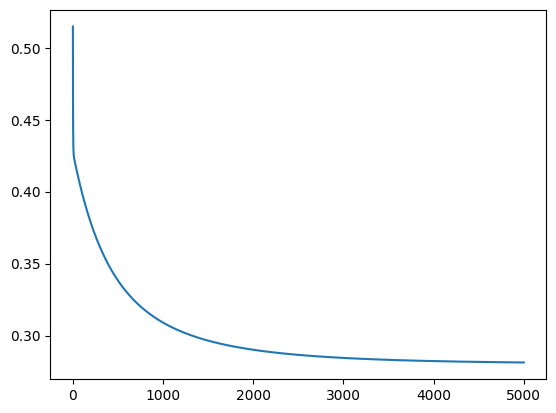

In [ ]:
J_lst=[]

for e in range(5000):
  y_hat_ = y_hat(X_train,w,b)
  w_step = alpha*dw(X_train,y_train,y_hat_)
  b_step =  alpha*db(y_train,y_hat_)
  w += -w_step
  b += -b_step

  y_hat_ = y_hat(X_train,w,b)
  J_lst.append(J(y_train,y_hat_))

plt.plot(J_lst)

In [ ]:
#איך להגיע להתכסות של פונקצית העלות? מה ניתן לכוונן פה?????

In [ ]:
print ('w=',w,'b=',b)

w= [-1.19523015 -1.19523015 -1.19523015 -1.19523015] b= -1.9415170343809025


In [ ]:
y_perd= y_hat(X_test,w,b)

In [ ]:
y_perd

array([0.02177754, 0.61112252, 0.19731684, 0.00240769, 0.80550858,
       0.001327  , 0.75506131, 0.01443694, 0.0308059 , 0.14216543,
       0.0781955 , 0.01885501, 0.1080573 , 0.04498347, 0.06340054,
       0.92676377, 0.07076202, 0.36970616, 0.93766788, 0.33631675,
       0.05828673, 0.09119606, 0.80689708, 0.97565377, 0.03784761,
       0.85259973, 0.40343389, 0.08237714, 0.88302884, 0.74031608,
       0.00813315, 0.11675411, 0.70479938, 0.02377695, 0.00939459,
       0.40883755, 0.28268505, 0.07056775])

In [ ]:

# השלימו מטה- יש לנו בעיה:
#y_pred מוציא ערכים שונים
#אבל
#הערכים של y_test
#הם רק 0 או 1
# נגדיר מערך y_pred_fix
# שיכיל ערכים מתוקנים
# השלימו מה לעשות
# רמז:



y_perd_fix=[]
for i in range(len(y_perd)):
    if y_perd[i]<0.5:
        y_perd_fix.append(0)
    else:
        y_perd_fix.append(1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_perd_fix)
print(cm)
accuracy_score(y_test, y_perd_fix)

[[23  2]
 [ 4  9]]


0.8421052631578947

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class PerceptronClass():

    def __init__(self, numOfInputs=4, epochs=1000, learningRate=0.01):
        self.epochs = epochs
        self.learningRate = learningRate
        self.weights = np.zeros(numOfInputs)
        self.bias = 1

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.Activation(linear_output)

                # Perceptron weight update rule:
                # weight := weight - learning_rate*(error)
                update = self.learningRate * (y_predicted - y_[idx])

                self.weights -= update * x_i
                self.bias -= update

    def Activation(self, s):
        activation = np.where(s > 0, 1, 0)
        return activation

    def predict(self, inputs):
        sum = np.dot(inputs, self.weights) + self.bias
        out = self.Activation(sum)
        return out

    def train(self, inputs, labels):
        for _ in range(self.epochs):
            for i in range(len(inputs)):
                prd = self.predict(inputs[i])
                self.weights += (labels[i] - prd) * inputs[i] * self.learningRate
                self.bias += (labels[i] - prd) * self.learningRate

df = pd.read_csv("/content/Iris_setosa.csv")

X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)
print()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

perceptron = PerceptronClass()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
y_pred_train = perceptron.predict(X_train)

acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_pred_train)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", acc)


[[4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.